In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
from google.colab import drive
drive.mount('/content/drive')

root_path = 'drive/MyDrive/NBA-predictions'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# our data consists of all regular season games from 2013 to the end of the 2015 season
all_games = pd.read_csv(root_path +'/data/nba_games_2013_2015.csv', sep=';')
all_games = all_games.sort_values(by=['GAME_DATE'])

In [4]:
all_games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
7379,22013,1610612754,IND,Indiana Pacers,21300001,2013-10-29,IND vs. ORL,W,241,97,34,71,0.479,7,17,0.412,22,32,0.688,10,34,44,17,4,18,20,13,10.0
7374,22013,1610612746,LAC,Los Angeles Clippers,21300003,2013-10-29,LAC @ LAL,L,239,103,41,83,0.494,8,21,0.381,13,23,0.565,10,30,40,27,11,4,16,21,-13.0
7375,22013,1610612753,ORL,Orlando Magic,21300001,2013-10-29,ORL @ IND,L,241,87,36,93,0.387,9,19,0.474,6,10,0.600,13,26,39,17,10,6,17,26,-10.0
7378,22013,1610612741,CHI,Chicago Bulls,21300002,2013-10-29,CHI @ MIA,L,238,95,35,83,0.422,7,26,0.269,18,23,0.783,11,30,41,23,11,4,18,27,-12.0
7377,22013,1610612747,LAL,Los Angeles Lakers,21300003,2013-10-29,LAL vs. LAC,W,240,116,42,93,0.452,14,29,0.483,18,28,0.643,18,34,52,23,8,6,19,23,13.0


In [5]:
df = all_games.copy()

In [6]:
# Miami (MIA) and Oklahoma (OKC) were the 2 finalists in 2012 - let's look at some of their season average stats.
df_2012 = pd.read_csv(root_path +'/data/2012_team_averages.csv')

In [7]:
df_2012.head()

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Miami Heat,82,66,16,0.805,48.5,102.9,38.4,77.4,49.6,8.7,22.1,39.6,17.4,23.0,75.4,8.2,30.4,38.6,23.0,13.9,8.7,5.4,3.2,18.7,20.4,7.9
1,Oklahoma City Thunder,82,60,22,0.732,48.4,105.7,38.1,79.3,48.1,7.3,19.4,37.7,22.2,26.8,82.8,10.4,33.2,43.6,21.4,15.3,8.3,7.6,3.9,20.2,20.7,9.2
2,San Antonio Spurs,82,58,24,0.707,48.5,103.0,39.1,81.4,48.1,8.1,21.5,37.6,16.6,21.0,79.1,8.1,33.2,41.3,25.1,14.7,8.5,5.4,4.9,17.4,19.1,6.4
3,Denver Nuggets,82,57,25,0.695,48.5,106.1,40.7,85.2,47.8,6.4,18.5,34.3,18.4,26.2,70.1,13.3,31.7,45.0,24.4,15.3,9.3,6.5,6.8,20.5,21.6,5.1
4,Los Angeles Clippers,82,56,26,0.683,48.1,101.1,38.5,80.6,47.8,7.6,21.4,35.8,16.4,23.0,71.1,11.4,30.2,41.6,23.9,14.6,9.6,5.6,4.1,20.9,20.9,6.5


In [8]:
df_2012.describe()

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,81.933333,40.966667,40.966667,0.500100,48.363333,98.136667,37.120000,82.026667,45.306667,7.163333,19.966667,35.756667,16.706667,22.19000,75.346667,11.170000,30.973333,42.133333,22.14000,14.550000,7.806667,5.136667,5.140000,19.843333,19.840000,0.000000
std,0.253708,12.710255,12.734648,0.155201,0.199107,4.052201,1.335303,2.078450,1.674748,1.409936,3.394248,1.946116,1.983194,2.60971,3.142010,1.428563,1.473193,1.737682,1.44045,0.805477,0.819980,0.888037,0.947811,1.238376,1.512158,4.608687
min,81.000000,20.000000,16.000000,0.244000,48.100000,93.200000,34.400000,77.400000,42.500000,4.700000,13.500000,30.500000,12.200000,16.60000,69.200000,8.100000,28.800000,38.600000,19.30000,12.000000,6.300000,3.600000,3.200000,17.400000,16.200000,-9.200000
25%,82.000000,29.500000,32.250000,0.360000,48.200000,94.750000,36.150000,81.000000,44.325000,6.225000,17.775000,34.625000,15.900000,20.77500,73.375000,10.725000,29.925000,40.925000,21.05000,14.100000,7.200000,4.500000,4.400000,18.775000,19.100000,-3.275000
50%,82.000000,42.000000,39.500000,0.515000,48.400000,97.350000,37.100000,81.600000,44.800000,6.950000,19.550000,35.800000,16.550000,21.80000,75.450000,11.300000,30.400000,41.950000,22.45000,14.650000,7.950000,5.000000,4.900000,20.150000,19.800000,-0.150000
75%,82.000000,49.000000,52.500000,0.603250,48.400000,101.100000,38.100000,83.850000,46.175000,7.925000,21.475000,36.600000,17.575000,23.45000,77.525000,12.100000,32.200000,43.200000,22.97500,15.075000,8.375000,5.475000,5.875000,20.675000,20.625000,3.875000
max,82.000000,66.000000,62.000000,0.805000,49.000000,106.100000,40.700000,87.800000,49.600000,10.900000,28.900000,40.300000,22.200000,27.90000,82.800000,13.300000,34.200000,45.900000,25.10000,16.400000,9.600000,7.600000,6.900000,22.400000,23.100000,9.200000


In [41]:
df_2012['+/-'][:8].sort_values

<bound method Series.sort_values of 0    7.9
1    9.2
2    6.4
3    5.1
4    6.5
5    4.1
6    4.2
7    1.8
Name: +/-, dtype: float64>

In [48]:
def plot_hist_best_n(df=df_2012, x='+/-', bins=8, best_n=3, figsize=(12, 9)):
  import matplotlib.pyplot as plt
  import seaborn as sns
  from matplotlib.pyplot import figure

  from matplotlib import rcParams

  # figure size in inches
  rcParams['figure.figsize'] = figsize
  '''
  Plots a histogram for the given column, plotting lines at specified locations indicating the top entries in the (presumably) sorted dataframe.

  `df` = DataFrame
  `column_iloc` = (int)  : the index for the column to be returned
  `best_n` = (int) : the # of entry values to be returned
      **best_n note: works with 8 entries or less (due to colors)

  `bins` = (int) : number of bins for histogram,

  Example:
    plot_hist_best_n(df=df_2012, x='+/-', bins=8, column_iloc=-1, best_n=8)

    line = plt.axvline(df_2012.iloc[best_n][column_iloc], 0, 6, c='orangered')

  '''
  
  # color dictionary for line colors
  # uses a heat scale (gold for #1)
  color_dict = {
      0 : 'gold',
      1 : 'y',
      2 : 'grey',
      3 : 'silver',
      4: 'sienna',
      5: 'saddlebrown',
      6: 'palevioletred',
      7: 'lightpink'
  }

  # copy df
  temp_df = df.copy()

  #a = sns.displot(temp_df, x=x, bins=bins)
  #a.figure.figsize = figsize
  plt.hist(temp_df[x], bins=bins)
  plt.grid(color='w', axis='x', linestyle='--')
  plt.xlabel(x, fontsize = 16)
  plt.ylabel("Count", fontsize=16)

  for i in range(best_n):

    line = plt.axvline(temp_df.iloc[i][x], 0, 30, c=color_dict[i], linewidth=4)
    line_title = str(f'{i+1}: '+ temp_df.iloc[i].TEAM) # set teamname
    line.set_label(line_title)

    print(line_title + ': ' + str(round(temp_df.iloc[i][x], 2)))
    #plt.annotate(str(i+1), xy=(temp_df.iloc[i][x], 0))
    #print(i)

  line = plt.axvline(temp_df[x].mean(), 0, 30, c='black', linewidth=2)
  line_title = 'Mean' # set label
  plt.annotate(line_title, xy=(temp_df[x].mean(), 0))
  line.set_label(line_title)
  plt.legend()

  print(line_title + ': ' + str(round(temp_df[x].mean(), 2)))
  
  return

ValueError: ignored

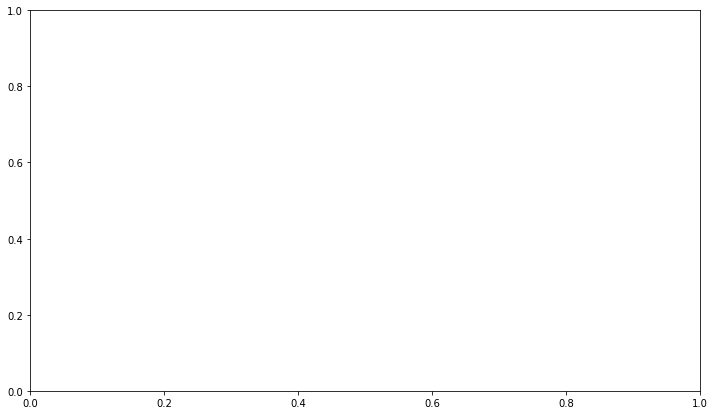

In [49]:
# Histogram looking at the PLUS_MINUS of the top 8 teams
plot_scatter_best_n(
    df=df_2012, 
    x='+/-', 
    bins=8,  
    best_n=8, 
    figsize=(12, 7)
    )

1: Miami Heat: 49.6
2: Oklahoma City Thunder: 48.1
3: San Antonio Spurs: 48.1
4: Denver Nuggets: 47.8
5: Los Angeles Clippers: 47.8
6: Memphis Grizzlies: 44.4
7: New York Knicks: 44.8
8: Brooklyn Nets: 45.0
Mean: 45.31


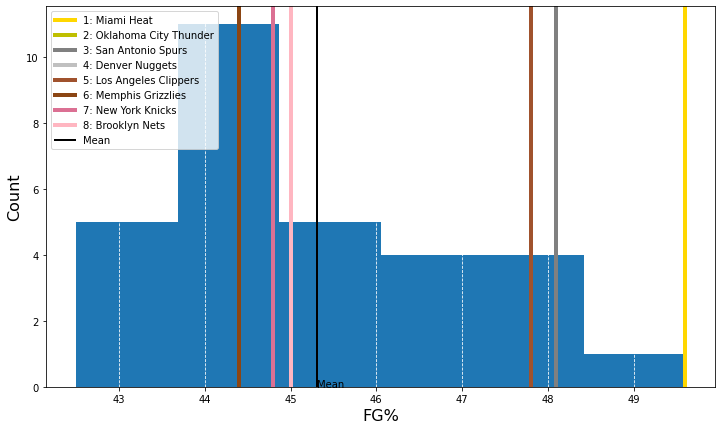

In [11]:
plot_hist_best_n(
    df=df_2012, 
    x='FG%', 
    bins='auto', 
    best_n=8, 
    figsize=(12, 7) 
    )

1: Miami Heat: 39.6
2: Oklahoma City Thunder: 37.7
3: San Antonio Spurs: 37.6
4: Denver Nuggets: 34.3
5: Los Angeles Clippers: 35.8
6: Memphis Grizzlies: 34.5
7: New York Knicks: 37.6
8: Brooklyn Nets: 35.7
Mean: 35.76


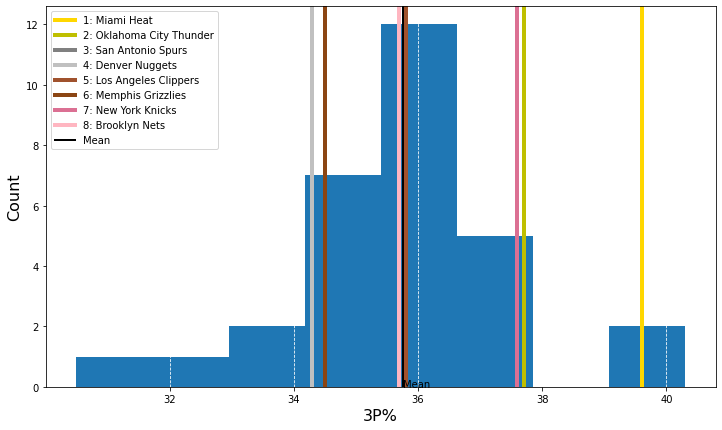

In [12]:
plot_hist_best_n(
    df=df_2012, 
    x='3P%', 
    bins='auto', 
    best_n=8, 
    figsize=(12, 7)
    )

1: Miami Heat: 75.4
2: Oklahoma City Thunder: 82.8
3: San Antonio Spurs: 79.1
4: Denver Nuggets: 70.1
5: Los Angeles Clippers: 71.1
6: Memphis Grizzlies: 77.3
7: New York Knicks: 75.9
8: Brooklyn Nets: 73.1
Mean: 75.35


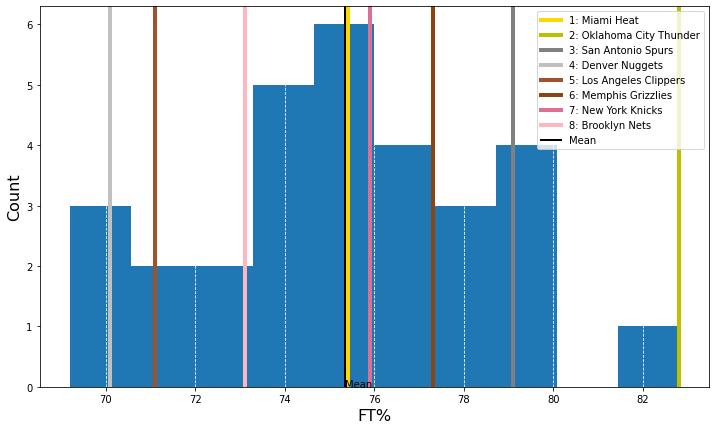

In [13]:
plot_hist_best_n(
    df=df_2012, 
    x='FT%', 
    bins=10, 
    best_n=8, 
    figsize=(12, 7)
    )

1: Miami Heat: 38.6
2: Oklahoma City Thunder: 43.6
3: San Antonio Spurs: 41.3
4: Denver Nuggets: 45.0
5: Los Angeles Clippers: 41.6
6: Memphis Grizzlies: 42.7
7: New York Knicks: 40.6
8: Brooklyn Nets: 42.8
Mean: 42.13


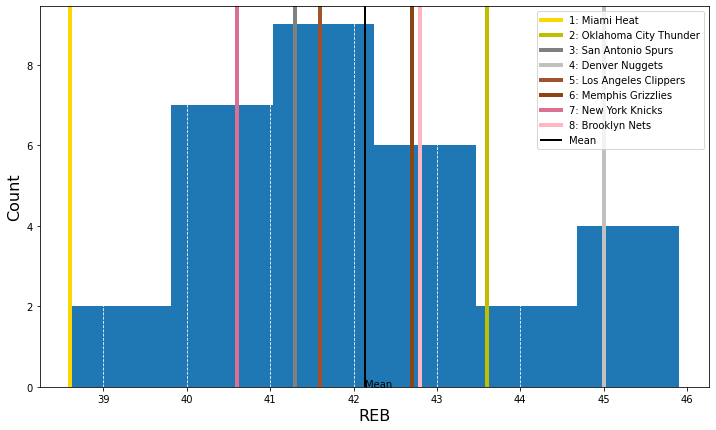

In [14]:
plot_hist_best_n(
    df=df_2012, 
    x='REB', 
    bins='auto', 
    best_n=8, 
    figsize=(12, 7)
    )

1: Miami Heat: 8.7
2: Oklahoma City Thunder: 8.3
3: San Antonio Spurs: 8.5
4: Denver Nuggets: 9.3
5: Los Angeles Clippers: 9.6
6: Memphis Grizzlies: 8.6
7: New York Knicks: 8.2
8: Brooklyn Nets: 7.3
Mean: 7.81


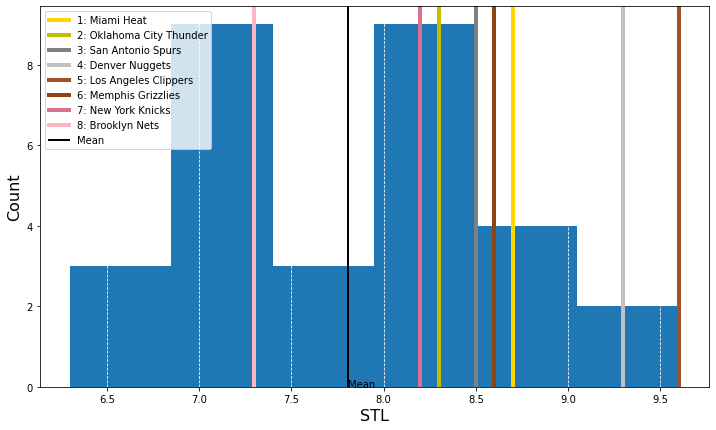

In [15]:
plot_hist_best_n(
    df=df_2012, 
    x='STL', 
    bins='auto', 
    best_n=8, 
    figsize=(12, 7)
    )

In [16]:
def plot_histograms_of_interest(df=df_2012):
  '''
  Contains all of the histograms of interest, to save time.
  '''
  import matplotlib.pyplot as plt
  import seaborn as sns
  from matplotlib.pyplot import figure

  from matplotlib import rcParams

  plot_hist_best_n(
      df=df, 
      x='+/-', 
      bins='auto',
      best_n=8, 
      figsize=(12, 7)
      )
  plt.show()

  plot_hist_best_n(
      df=df,
      x='FG%', 
      bins='auto', 
      best_n=8, 
      figsize=(12, 7)
      )
  plt.show()
  
  plot_hist_best_n(
      df=df, 
      x='3P%', 
      bins='auto', 
      best_n=8, 
      figsize=(12, 7)
      )
  plt.show()
  
  plot_hist_best_n(
      df=df, 
      x='FT%', 
      bins='auto', 
      best_n=8, 
      figsize=(12, 7)
      )
  plt.show()
  
  plot_hist_best_n(
      df=df, 
      x='REB', 
      bins='auto', 
      best_n=8, 
      figsize=(12, 7)
      )
  plt.show()
  
  plot_hist_best_n(
      df=df, 
      x='STL', 
      bins='auto', 
      best_n=8, 
      figsize=(12, 7)
      )
  plt.show()

  plot_hist_best_n(
      df=df, 
      x='TOV', 
      bins='auto', 
      best_n=8, 
      figsize=(12, 7)
      )
  plt.show()

  return

In [17]:
# Let's normalize the data from above to see if there's any visual improvement
cols_to_normalize = ['+/-',
                     'FG%',
                     '3P%',
                     'FT%',
                     'REB',
                     'STL',
                     'TOV']

normalized_df = pd.DataFrame()
normalized_df['TEAM'] = df_2012['TEAM']

for col in cols_to_normalize:
  #print(col)
  temp = df_2012[col].values
  normalized_df[col] = (temp-temp.min())/(temp.max()-temp.min())

normalized_df.head()

,TEAM,+/-,FG%,3P%,FT%,REB,STL,TOV
0,Miami Heat,0.929348,1.000000,0.928571,0.455882,0.000000,0.727273,0.431818
1,Oklahoma City Thunder,1.000000,0.788732,0.734694,1.000000,0.684932,0.606061,0.750000
2,San Antonio Spurs,0.847826,0.788732,0.724490,0.727941,0.369863,0.666667,0.613636
3,Denver Nuggets,0.777174,0.746479,0.387755,0.066176,0.876712,0.909091,0.750000
4,Los Angeles Clippers,0.853261,0.746479,0.540816,0.139706,0.410959,1.000000,0.590909


1: Miami Heat: 0.93
2: Oklahoma City Thunder: 1.0
3: San Antonio Spurs: 0.85
4: Denver Nuggets: 0.78
5: Los Angeles Clippers: 0.85
6: Memphis Grizzlies: 0.72
7: New York Knicks: 0.73
8: Brooklyn Nets: 0.6
Mean: 0.5


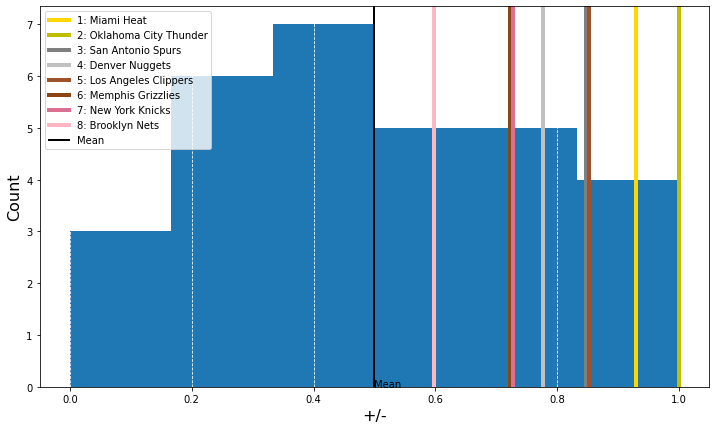

1: Miami Heat: 1.0
2: Oklahoma City Thunder: 0.79
3: San Antonio Spurs: 0.79
4: Denver Nuggets: 0.75
5: Los Angeles Clippers: 0.75
6: Memphis Grizzlies: 0.27
7: New York Knicks: 0.32
8: Brooklyn Nets: 0.35
Mean: 0.4


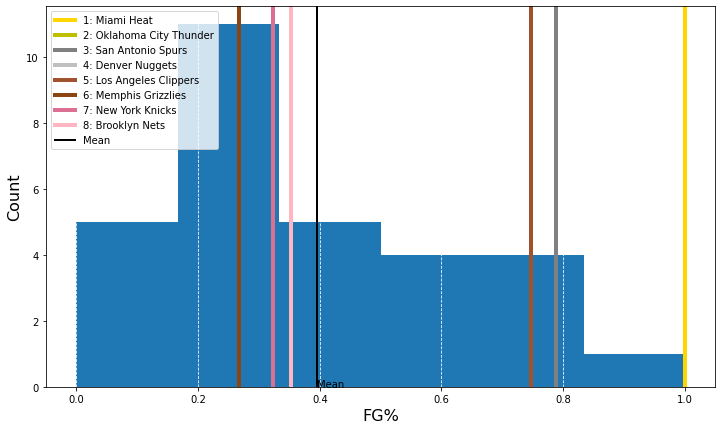

1: Miami Heat: 0.93
2: Oklahoma City Thunder: 0.73
3: San Antonio Spurs: 0.72
4: Denver Nuggets: 0.39
5: Los Angeles Clippers: 0.54
6: Memphis Grizzlies: 0.41
7: New York Knicks: 0.72
8: Brooklyn Nets: 0.53
Mean: 0.54


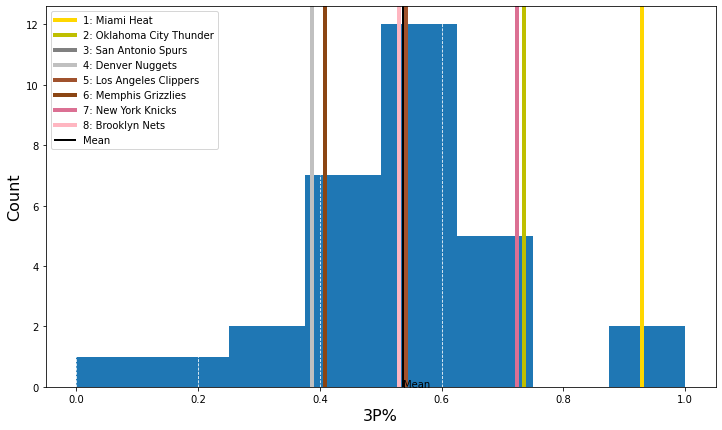

1: Miami Heat: 0.46
2: Oklahoma City Thunder: 1.0
3: San Antonio Spurs: 0.73
4: Denver Nuggets: 0.07
5: Los Angeles Clippers: 0.14
6: Memphis Grizzlies: 0.6
7: New York Knicks: 0.49
8: Brooklyn Nets: 0.29
Mean: 0.45


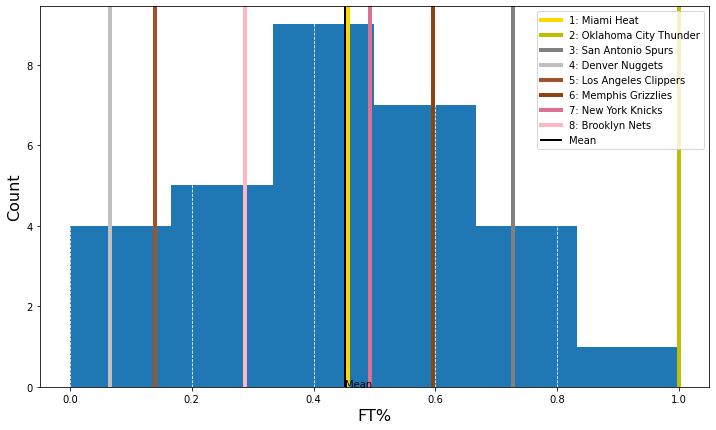

1: Miami Heat: 0.0
2: Oklahoma City Thunder: 0.68
3: San Antonio Spurs: 0.37
4: Denver Nuggets: 0.88
5: Los Angeles Clippers: 0.41
6: Memphis Grizzlies: 0.56
7: New York Knicks: 0.27
8: Brooklyn Nets: 0.58
Mean: 0.48


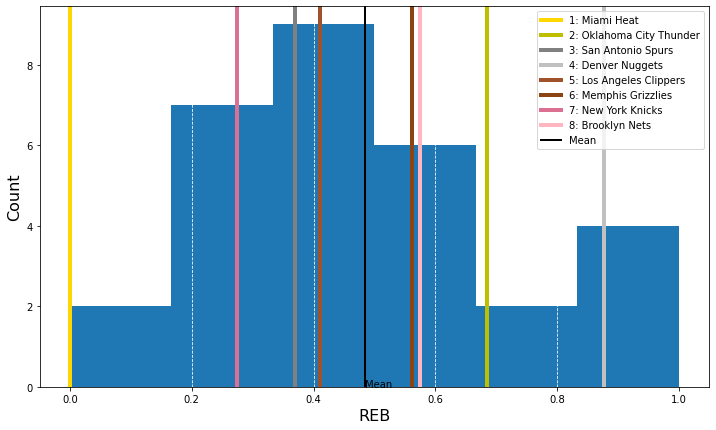

1: Miami Heat: 0.73
2: Oklahoma City Thunder: 0.61
3: San Antonio Spurs: 0.67
4: Denver Nuggets: 0.91
5: Los Angeles Clippers: 1.0
6: Memphis Grizzlies: 0.7
7: New York Knicks: 0.58
8: Brooklyn Nets: 0.3
Mean: 0.46


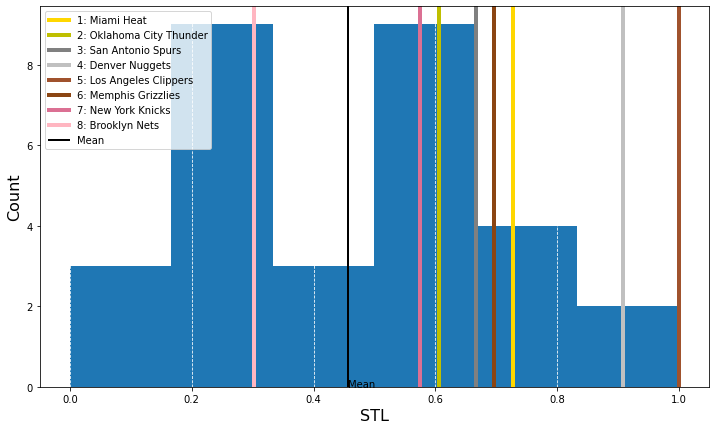

1: Miami Heat: 0.43
2: Oklahoma City Thunder: 0.75
3: San Antonio Spurs: 0.61
4: Denver Nuggets: 0.75
5: Los Angeles Clippers: 0.59
6: Memphis Grizzlies: 0.45
7: New York Knicks: 0.0
8: Brooklyn Nets: 0.61
Mean: 0.58


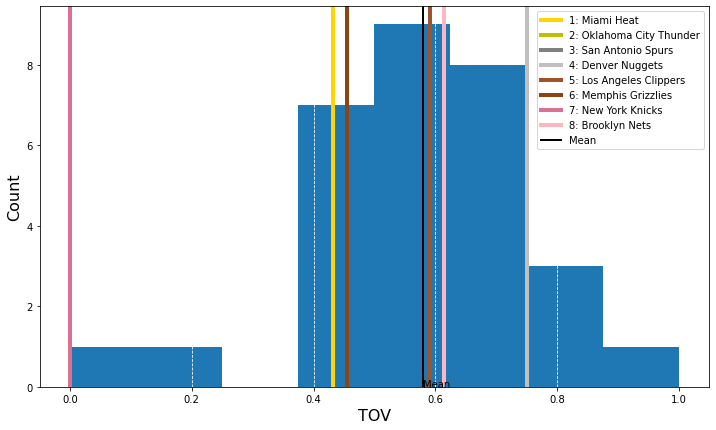

In [18]:
plot_histograms_of_interest(df=normalized_df)

In [19]:
# Let's look at the top 100 players (with respect to points) for the 2012 season, and see how many of them are on these top 8 teams.
top_players = pd.read_csv(root_path +'/data/top_100_players_2012.csv')
top_players.head(25)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Carmelo Anthony,NYK,29,67,47,20,37.0,28.7,10.0,22.2,44.9,2.3,6.2,37.9,6.3,7.6,83.0,2.0,4.9,6.9,2.6,2.6,0.8,0.5,3.1,41.9,10,0,4.6
1,Kevin Durant,OKC,24,81,60,21,38.5,28.1,9.0,17.7,51.0,1.7,4.1,41.6,8.4,9.3,90.5,0.6,7.3,7.9,4.6,3.5,1.4,1.3,1.8,49.3,19,3,8.9
2,Kobe Bryant,LAL,34,78,42,36,38.6,27.3,9.5,20.4,46.3,1.7,5.2,32.4,6.7,8.0,83.9,0.8,4.7,5.6,6.0,3.7,1.4,0.3,2.2,44.4,16,2,1.8
3,LeBron James,MIA,28,76,61,15,37.9,26.8,10.1,17.8,56.5,1.4,3.3,40.6,5.3,7.0,75.3,1.3,6.8,8.0,7.3,3.0,1.7,0.9,1.4,52.1,36,4,9.5
4,James Harden,HOU,23,78,43,35,38.3,25.9,7.5,17.1,43.8,2.3,6.2,36.8,8.6,10.2,85.1,0.8,4.1,4.9,5.8,3.8,1.8,0.5,2.3,43.7,9,1,2.5
5,Russell Westbrook,OKC,24,82,60,22,34.9,23.2,8.2,18.7,43.8,1.2,3.7,32.3,5.6,7.0,80.0,1.4,3.9,5.2,7.4,3.3,1.8,0.3,2.3,43.4,23,1,7.7
6,Stephen Curry,GSW,25,78,45,33,38.2,22.9,8.0,17.8,45.1,3.5,7.7,45.3,3.4,3.7,90.0,0.8,3.3,4.0,6.9,3.1,1.6,0.2,2.5,40.3,15,0,1.7
7,Kyrie Irving,CLE,21,59,19,40,34.7,22.5,8.2,18.1,45.2,1.8,4.7,39.1,4.2,4.9,85.5,0.6,3.1,3.7,5.9,3.2,1.5,0.4,2.5,38.1,4,0,-3.0
8,Dwyane Wade,MIA,31,69,55,14,34.6,21.2,8.2,15.8,52.1,0.2,1.0,25.8,4.5,6.2,72.5,1.2,3.7,5.0,5.1,2.8,1.9,0.8,2.0,40.0,4,0,8.3
9,LaMarcus Aldridge,POR,27,74,32,42,37.7,21.1,8.6,17.8,48.4,0.0,0.2,14.3,3.8,4.7,81.0,2.4,6.7,9.1,2.6,1.9,0.8,1.2,2.5,40.1,38,0,-0.3


In [20]:
top_players['TEAM'].nunique() # there is at least one player from every team in the top 100

30

In [21]:
top_players['TEAM'].value_counts().mean()

3.3333333333333335

In [22]:
top_10_team_dict = {
    'Miami Heat' : 'MIA',
    'Oklahoma City Thunder' : 'OKC',
    'San Antonio Spurs' : 'SAS',
    'Denver Nuggets' : 'DEN',
    'Los Angeles Clippers' : 'LAC',
    'Memphis Grizzlies' : 'MEM',
    'New York Knicks' : 'NYK',
    'Brooklyn Nets' : 'BKN',
    'Indiana Pacers' : 'IND',
    'Golden State Warriors' : 'GSW'
}

In [23]:
top_10_teams = df_2012[:10]
top_10_teams['TEAM_ABREV'] = top_10_teams['TEAM'].replace(top_10_team_dict)
top_10_teams

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,TEAM_ABREV
0,Miami Heat,82,66,16,0.805,48.5,102.9,38.4,77.4,49.6,8.7,22.1,39.6,17.4,23.0,75.4,8.2,30.4,38.6,23.0,13.9,8.7,5.4,3.2,18.7,20.4,7.9,MIA
1,Oklahoma City Thunder,82,60,22,0.732,48.4,105.7,38.1,79.3,48.1,7.3,19.4,37.7,22.2,26.8,82.8,10.4,33.2,43.6,21.4,15.3,8.3,7.6,3.9,20.2,20.7,9.2,OKC
2,San Antonio Spurs,82,58,24,0.707,48.5,103.0,39.1,81.4,48.1,8.1,21.5,37.6,16.6,21.0,79.1,8.1,33.2,41.3,25.1,14.7,8.5,5.4,4.9,17.4,19.1,6.4,SAS
3,Denver Nuggets,82,57,25,0.695,48.5,106.1,40.7,85.2,47.8,6.4,18.5,34.3,18.4,26.2,70.1,13.3,31.7,45.0,24.4,15.3,9.3,6.5,6.8,20.5,21.6,5.1,DEN
4,Los Angeles Clippers,82,56,26,0.683,48.1,101.1,38.5,80.6,47.8,7.6,21.4,35.8,16.4,23.0,71.1,11.4,30.2,41.6,23.9,14.6,9.6,5.6,4.1,20.9,20.9,6.5,LAC
5,Memphis Grizzlies,82,56,26,0.683,48.3,93.4,36.1,81.5,44.4,4.7,13.5,34.5,16.5,21.3,77.3,12.9,29.8,42.7,20.9,14.0,8.6,5.3,5.5,20.2,20.0,4.1,MEM
6,New York Knicks,82,54,28,0.659,48.1,100.0,36.5,81.6,44.8,10.9,28.9,37.6,16.0,21.1,75.9,10.9,29.7,40.6,19.3,12.0,8.2,3.6,4.0,20.1,19.2,4.2,NYK
7,Brooklyn Nets,82,49,33,0.598,48.4,96.9,35.9,79.8,45.0,7.7,21.5,35.7,17.5,23.9,73.1,12.8,30.0,42.8,20.3,14.7,7.3,4.8,4.8,18.3,21.4,1.8,BKN
8,Indiana Pacers,81,49,32,0.605,48.4,94.7,35.1,80.6,43.6,6.9,19.7,34.7,17.6,23.6,74.6,12.9,33.0,45.9,20.3,15.1,7.2,6.3,5.7,20.0,21.9,4.0,IND
9,Golden State Warriors,82,47,35,0.573,48.3,101.2,38.2,83.4,45.8,8.0,19.9,40.3,16.8,21.3,79.0,10.8,34.2,45.0,22.5,15.1,6.9,4.2,4.9,21.4,19.2,0.9,GSW


In [24]:
top_100_player_dict = top_players['TEAM'].value_counts().to_dict()
top_10_teams['TOP_PLAYER_COUNT'] = top_10_teams['TEAM_ABREV'].replace(top_100_player_dict)
top_10_teams

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,TEAM_ABREV,TOP_PLAYER_COUNT
0,Miami Heat,82,66,16,0.805,48.5,102.9,38.4,77.4,49.6,8.7,22.1,39.6,17.4,23.0,75.4,8.2,30.4,38.6,23.0,13.9,8.7,5.4,3.2,18.7,20.4,7.9,MIA,3
1,Oklahoma City Thunder,82,60,22,0.732,48.4,105.7,38.1,79.3,48.1,7.3,19.4,37.7,22.2,26.8,82.8,10.4,33.2,43.6,21.4,15.3,8.3,7.6,3.9,20.2,20.7,9.2,OKC,4
2,San Antonio Spurs,82,58,24,0.707,48.5,103.0,39.1,81.4,48.1,8.1,21.5,37.6,16.6,21.0,79.1,8.1,33.2,41.3,25.1,14.7,8.5,5.4,4.9,17.4,19.1,6.4,SAS,2
3,Denver Nuggets,82,57,25,0.695,48.5,106.1,40.7,85.2,47.8,6.4,18.5,34.3,18.4,26.2,70.1,13.3,31.7,45.0,24.4,15.3,9.3,6.5,6.8,20.5,21.6,5.1,DEN,4
4,Los Angeles Clippers,82,56,26,0.683,48.1,101.1,38.5,80.6,47.8,7.6,21.4,35.8,16.4,23.0,71.1,11.4,30.2,41.6,23.9,14.6,9.6,5.6,4.1,20.9,20.9,6.5,LAC,3
5,Memphis Grizzlies,82,56,26,0.683,48.3,93.4,36.1,81.5,44.4,4.7,13.5,34.5,16.5,21.3,77.3,12.9,29.8,42.7,20.9,14.0,8.6,5.3,5.5,20.2,20.0,4.1,MEM,3
6,New York Knicks,82,54,28,0.659,48.1,100.0,36.5,81.6,44.8,10.9,28.9,37.6,16.0,21.1,75.9,10.9,29.7,40.6,19.3,12.0,8.2,3.6,4.0,20.1,19.2,4.2,NYK,4
7,Brooklyn Nets,82,49,33,0.598,48.4,96.9,35.9,79.8,45.0,7.7,21.5,35.7,17.5,23.9,73.1,12.8,30.0,42.8,20.3,14.7,7.3,4.8,4.8,18.3,21.4,1.8,BKN,3
8,Indiana Pacers,81,49,32,0.605,48.4,94.7,35.1,80.6,43.6,6.9,19.7,34.7,17.6,23.6,74.6,12.9,33.0,45.9,20.3,15.1,7.2,6.3,5.7,20.0,21.9,4.0,IND,3
9,Golden State Warriors,82,47,35,0.573,48.3,101.2,38.2,83.4,45.8,8.0,19.9,40.3,16.8,21.3,79.0,10.8,34.2,45.0,22.5,15.1,6.9,4.2,4.9,21.4,19.2,0.9,GSW,4


In [25]:
# There isn't much difference between the league average of top players per team, and the distribution of the top players per top team
# This doesn't take into account 'how good' each player is though
# Maybe we should be more exclusive to our list, and look at the players specifically
print('Top_100_players_per_team_MEAN = ' + str(top_players['TEAM'].value_counts().mean()))
print('Top_players_per_top_10_teams_MEAN = ' + str(top_10_teams['TOP_PLAYER_COUNT'].mean()))

Top_100_players_per_team_MEAN = 3.3333333333333335
Top_players_per_top_10_teams_MEAN = 3.3


In [26]:
# top_10_teams = df_2012[:10]
# top_10_teams['TEAM_ABREV'] = top_10_teams['TEAM'].replace(top_10_team_dict)
# top_10_teams

In [27]:
top_10_teams = df_2012[:10]
top_10_teams['TEAM_ABREV'] = top_10_teams['TEAM'].replace(top_10_team_dict)
top_10_teams

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,TEAM_ABREV
0,Miami Heat,82,66,16,0.805,48.5,102.9,38.4,77.4,49.6,8.7,22.1,39.6,17.4,23.0,75.4,8.2,30.4,38.6,23.0,13.9,8.7,5.4,3.2,18.7,20.4,7.9,MIA
1,Oklahoma City Thunder,82,60,22,0.732,48.4,105.7,38.1,79.3,48.1,7.3,19.4,37.7,22.2,26.8,82.8,10.4,33.2,43.6,21.4,15.3,8.3,7.6,3.9,20.2,20.7,9.2,OKC
2,San Antonio Spurs,82,58,24,0.707,48.5,103.0,39.1,81.4,48.1,8.1,21.5,37.6,16.6,21.0,79.1,8.1,33.2,41.3,25.1,14.7,8.5,5.4,4.9,17.4,19.1,6.4,SAS
3,Denver Nuggets,82,57,25,0.695,48.5,106.1,40.7,85.2,47.8,6.4,18.5,34.3,18.4,26.2,70.1,13.3,31.7,45.0,24.4,15.3,9.3,6.5,6.8,20.5,21.6,5.1,DEN
4,Los Angeles Clippers,82,56,26,0.683,48.1,101.1,38.5,80.6,47.8,7.6,21.4,35.8,16.4,23.0,71.1,11.4,30.2,41.6,23.9,14.6,9.6,5.6,4.1,20.9,20.9,6.5,LAC
5,Memphis Grizzlies,82,56,26,0.683,48.3,93.4,36.1,81.5,44.4,4.7,13.5,34.5,16.5,21.3,77.3,12.9,29.8,42.7,20.9,14.0,8.6,5.3,5.5,20.2,20.0,4.1,MEM
6,New York Knicks,82,54,28,0.659,48.1,100.0,36.5,81.6,44.8,10.9,28.9,37.6,16.0,21.1,75.9,10.9,29.7,40.6,19.3,12.0,8.2,3.6,4.0,20.1,19.2,4.2,NYK
7,Brooklyn Nets,82,49,33,0.598,48.4,96.9,35.9,79.8,45.0,7.7,21.5,35.7,17.5,23.9,73.1,12.8,30.0,42.8,20.3,14.7,7.3,4.8,4.8,18.3,21.4,1.8,BKN
8,Indiana Pacers,81,49,32,0.605,48.4,94.7,35.1,80.6,43.6,6.9,19.7,34.7,17.6,23.6,74.6,12.9,33.0,45.9,20.3,15.1,7.2,6.3,5.7,20.0,21.9,4.0,IND
9,Golden State Warriors,82,47,35,0.573,48.3,101.2,38.2,83.4,45.8,8.0,19.9,40.3,16.8,21.3,79.0,10.8,34.2,45.0,22.5,15.1,6.9,4.2,4.9,21.4,19.2,0.9,GSW


In [28]:
top_20_player_dict = top_players[:20]['TEAM'].value_counts().to_dict()
top_10_teams['TOP_PLAYER_COUNT'] = top_10_teams['TEAM_ABREV'].replace(top_20_player_dict)
top_10_teams

# This shows us a little more information, the top 3 teams have the top 5 players in the league.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,TEAM_ABREV,TOP_PLAYER_COUNT
0,Miami Heat,82,66,16,0.805,48.5,102.9,38.4,77.4,49.6,8.7,22.1,39.6,17.4,23.0,75.4,8.2,30.4,38.6,23.0,13.9,8.7,5.4,3.2,18.7,20.4,7.9,MIA,2
1,Oklahoma City Thunder,82,60,22,0.732,48.4,105.7,38.1,79.3,48.1,7.3,19.4,37.7,22.2,26.8,82.8,10.4,33.2,43.6,21.4,15.3,8.3,7.6,3.9,20.2,20.7,9.2,OKC,2
2,San Antonio Spurs,82,58,24,0.707,48.5,103.0,39.1,81.4,48.1,8.1,21.5,37.6,16.6,21.0,79.1,8.1,33.2,41.3,25.1,14.7,8.5,5.4,4.9,17.4,19.1,6.4,SAS,1
3,Denver Nuggets,82,57,25,0.695,48.5,106.1,40.7,85.2,47.8,6.4,18.5,34.3,18.4,26.2,70.1,13.3,31.7,45.0,24.4,15.3,9.3,6.5,6.8,20.5,21.6,5.1,DEN,DEN
4,Los Angeles Clippers,82,56,26,0.683,48.1,101.1,38.5,80.6,47.8,7.6,21.4,35.8,16.4,23.0,71.1,11.4,30.2,41.6,23.9,14.6,9.6,5.6,4.1,20.9,20.9,6.5,LAC,LAC
5,Memphis Grizzlies,82,56,26,0.683,48.3,93.4,36.1,81.5,44.4,4.7,13.5,34.5,16.5,21.3,77.3,12.9,29.8,42.7,20.9,14.0,8.6,5.3,5.5,20.2,20.0,4.1,MEM,MEM
6,New York Knicks,82,54,28,0.659,48.1,100.0,36.5,81.6,44.8,10.9,28.9,37.6,16.0,21.1,75.9,10.9,29.7,40.6,19.3,12.0,8.2,3.6,4.0,20.1,19.2,4.2,NYK,1
7,Brooklyn Nets,82,49,33,0.598,48.4,96.9,35.9,79.8,45.0,7.7,21.5,35.7,17.5,23.9,73.1,12.8,30.0,42.8,20.3,14.7,7.3,4.8,4.8,18.3,21.4,1.8,BKN,2
8,Indiana Pacers,81,49,32,0.605,48.4,94.7,35.1,80.6,43.6,6.9,19.7,34.7,17.6,23.6,74.6,12.9,33.0,45.9,20.3,15.1,7.2,6.3,5.7,20.0,21.9,4.0,IND,IND
9,Golden State Warriors,82,47,35,0.573,48.3,101.2,38.2,83.4,45.8,8.0,19.9,40.3,16.8,21.3,79.0,10.8,34.2,45.0,22.5,15.1,6.9,4.2,4.9,21.4,19.2,0.9,GSW,2


In [29]:
print('-- THE TOP 10 TEAMS --')
for k, v in enumerate(top_10_team_dict):
  print(f'{k+1}: {top_10_team_dict[v]}')

-- THE TOP 10 TEAMS --
1: MIA
2: OKC
3: SAS
4: DEN
5: LAC
6: MEM
7: NYK
8: BKN
9: IND
10: GSW


In [30]:
df_filter = top_players.TEAM == 'MIA'
print(top_players[df_filter]['PTS'].sum()/top_10_teams.iloc[0].PTS) # The top 3 Miami players contribute to 63% of the team's average points per game

0.6277939747327501


In [31]:
top_players[:10]

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Carmelo Anthony,NYK,29,67,47,20,37.0,28.7,10.0,22.2,44.9,2.3,6.2,37.9,6.3,7.6,83.0,2.0,4.9,6.9,2.6,2.6,0.8,0.5,3.1,41.9,10,0,4.6
1,Kevin Durant,OKC,24,81,60,21,38.5,28.1,9.0,17.7,51.0,1.7,4.1,41.6,8.4,9.3,90.5,0.6,7.3,7.9,4.6,3.5,1.4,1.3,1.8,49.3,19,3,8.9
2,Kobe Bryant,LAL,34,78,42,36,38.6,27.3,9.5,20.4,46.3,1.7,5.2,32.4,6.7,8.0,83.9,0.8,4.7,5.6,6.0,3.7,1.4,0.3,2.2,44.4,16,2,1.8
3,LeBron James,MIA,28,76,61,15,37.9,26.8,10.1,17.8,56.5,1.4,3.3,40.6,5.3,7.0,75.3,1.3,6.8,8.0,7.3,3.0,1.7,0.9,1.4,52.1,36,4,9.5
4,James Harden,HOU,23,78,43,35,38.3,25.9,7.5,17.1,43.8,2.3,6.2,36.8,8.6,10.2,85.1,0.8,4.1,4.9,5.8,3.8,1.8,0.5,2.3,43.7,9,1,2.5
5,Russell Westbrook,OKC,24,82,60,22,34.9,23.2,8.2,18.7,43.8,1.2,3.7,32.3,5.6,7.0,80.0,1.4,3.9,5.2,7.4,3.3,1.8,0.3,2.3,43.4,23,1,7.7
6,Stephen Curry,GSW,25,78,45,33,38.2,22.9,8.0,17.8,45.1,3.5,7.7,45.3,3.4,3.7,90.0,0.8,3.3,4.0,6.9,3.1,1.6,0.2,2.5,40.3,15,0,1.7
7,Kyrie Irving,CLE,21,59,19,40,34.7,22.5,8.2,18.1,45.2,1.8,4.7,39.1,4.2,4.9,85.5,0.6,3.1,3.7,5.9,3.2,1.5,0.4,2.5,38.1,4,0,-3.0
8,Dwyane Wade,MIA,31,69,55,14,34.6,21.2,8.2,15.8,52.1,0.2,1.0,25.8,4.5,6.2,72.5,1.2,3.7,5.0,5.1,2.8,1.9,0.8,2.0,40.0,4,0,8.3
9,LaMarcus Aldridge,POR,27,74,32,42,37.7,21.1,8.6,17.8,48.4,0.0,0.2,14.3,3.8,4.7,81.0,2.4,6.7,9.1,2.6,1.9,0.8,1.2,2.5,40.1,38,0,-0.3


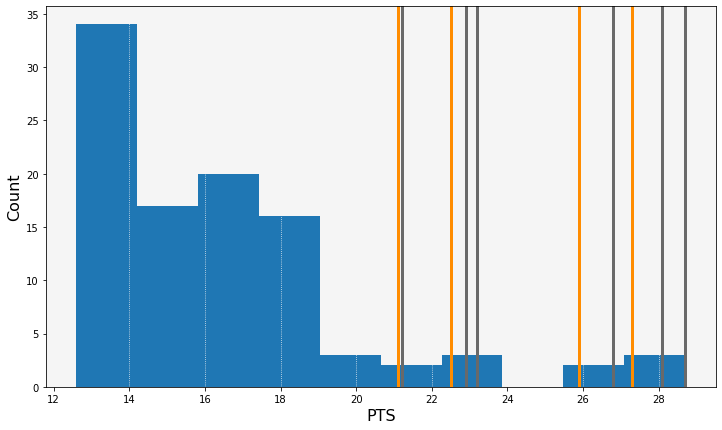

In [32]:
plt.hist(top_players['PTS'], bins='auto')
plt.grid(color='whitesmoke', axis='x', linestyle=':')
plt.xlabel('PTS', fontsize = 16)
plt.ylabel("Count", fontsize = 16)
ax = plt.gca()
ax.set_facecolor('whitesmoke')


for i in range(10):
  if top_players.iloc[i].TEAM in top_10_team_dict.values():
    #print(top_players.iloc[i].TEAM)
    line = plt.axvline(top_players.iloc[i].PTS, 0, 30, c='dimgray', linewidth=3)
  else:
    line = plt.axvline(top_players.iloc[i].PTS, 0, 30, c='darkorange', linewidth=3)

  